# Different ways of fitting the splines

In [1]:
# General imports
import matplotlib.pyplot as plt
import numpy as np
import json

In [2]:
from ccs_fit.scripts.ccs_fetch import ccs_fetch

ccs_fetch(mode="CCS",DFT_DB="DFT.db",include_forces=False)

    Fetching data: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 192/192 [00:00<00:00, 278.09it/s]


In [3]:
### Generate input.json file
input={
    "General": {
        "interface": "CCS",
        "merging"  : "True",
    },
    "Twobody": {
                "Xx-Xx": {
                        "Rcut": 6.0,
                        "Resolution": 0.5,
                        "Swtype": "sw",
                        "const_type" : "Mono",
                        "search_mode": "full",
                },
        }
}
#SAVE TO FILE
with open('CCS_input.json', 'w') as f:
    json.dump(input, f, indent=8)

In [4]:
#RUN FIT
from ccs_fit import ccs_fit

ccs_fit("CCS_input.json")

    Generating one-body information from training-set.
        Added elements:  ['O', 'Zn']
    Generating two-body potentials from one-body information.
    Adding pair: O-O
    Adding pair: O-Zn
    Adding pair: Zn-Zn
    Applying monotonic constraints for pair:  O-O
    Applying monotonic constraints for pair:  O-Zn
    Applying monotonic constraints for pair:  Zn-Zn
    There is linear dependence in stochiometry matrix!
    Removing onebody term: Zn


    Finding optimum switch: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 891/891 [00:01<00:00, 473.40it/s]

    The best switch is (2, 1, 8) with rmse: 0.16239150224072688, corresponding to distances of [3.04 1.93 6.04] Å for element pairs ['O-O', 'O-Zn', 'Zn-Zn'].


In [5]:
input={
    "General": {
        "interface": "CCS",
        "merging"  : "True",
    },
    "Twobody": {
                "O-O": {
                        "Rcut": 6.0,
                        "Resolution": 0.05,
                        "Swtype": "rep",
                        "const_type" : "Mono",
                        "search_mode": "range",
                        "range_center": 3.04,
                        "range_width": 0.5 # Å
                },
                "O-Zn": {
                        "Rcut": 6.0,
                        "Resolution": 0.05,
                        "Swtype": "sw",
                        "const_type" : "Mono",
                        "search_mode": "range",
                        "range_center": 1.93,
                        "range_width": 0.5 # Å
                },
                "Zn-Zn": {
                        "Rcut": 6.0,
                        "Resolution": 0.05,
                        "Swtype": "sw",
                        "const_type" : "Mono",
                        "search_mode": "range",
                        "range_center": 6.04,
                        "range_width": 0.5 # Å
                }
        }
}
#SAVE TO FILE
with open('CCS_input.json', 'w') as f:
    json.dump(input, f, indent=8)

In [6]:
#RUN ADDTIONAL FIT

ccs_fit("CCS_input.json")

    Generating one-body information from training-set.
        Added elements:  ['O', 'Zn']
    Applying monotonic constraints for pair:  O-O
    Applying monotonic constraints for pair:  O-Zn
    Applying monotonic constraints for pair:  Zn-Zn
    Merging intervals for pair O-Zn; number of intervals reduced from 88 to 86. 
    There is linear dependence in stochiometry matrix!
    Removing onebody term: Zn
    Range search turned on for element pair O-Zn; 10 possible switch indices in range of 1.66-2.41 Å.
    Range search turned on for element pair Zn-Zn; 5 possible switch indices in range of 5.51-6.01 Å.


    Finding optimum switch: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 14.54it/s]


    The best switch is (76, 10, 72) with rmse: 0.11761377470347595, corresponding to distances of [6.06 2.16 5.86] Å for element pairs ['O-O', 'O-Zn', 'Zn-Zn'].


In [7]:
input={
    "General": {
        "interface": "CCS",
        "merging"  : "True",
    },
    "Twobody": {
                "O-O": {
                        "Rcut": 6.0,
                        "Resolution": 0.02,
                        "Swtype": "rep",
                        "const_type" : "Mono"
                },
                "O-Zn": {
                        "Rcut": 6.0,
                        "Resolution": 0.02,
                        "Swtype": "sw",
                        "const_type" : "Mono",
                        "search_mode": "range",
                        "range_center": 2.16,
                        "range_width": 0.2 # Å
                },
                "Zn-Zn": {
                        "Rcut": 6.0,
                        "Resolution": 0.02,
                        "Swtype": "sw",
                        "const_type" : "Mono",
                        "search_mode": "range",
                        "range_center": 5.86,
                        "range_width": 0.2 # Å
                }
        }
}
#SAVE TO FILE
with open('CCS_input.json', 'w') as f:
    json.dump(input, f, indent=8)

In [8]:
#RUN ADDTIONAL FIT

ccs_fit("CCS_input.json")

    Generating one-body information from training-set.
        Added elements:  ['O', 'Zn']
    Applying monotonic constraints for pair:  O-O
    Applying monotonic constraints for pair:  O-Zn
    Applying monotonic constraints for pair:  Zn-Zn
    Merging intervals for pair O-O; number of intervals reduced from 188 to 184. 
    Merging intervals for pair O-Zn; number of intervals reduced from 218 to 204. 
    Merging intervals for pair Zn-Zn; number of intervals reduced from 188 to 184. 
    There is linear dependence in stochiometry matrix!
    Removing onebody term: Zn
    Range search turned on for element pair O-Zn; 10 possible switch indices in range of 1.95-2.35 Å.
    Range search turned on for element pair Zn-Zn; 10 possible switch indices in range of 5.66-6.02 Å.


    Finding optimum switch: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:17<00:00,  5.84it/s]


    The best switch is (184, 29, 177) with rmse: 0.10964032105024137, corresponding to distances of [5.96 2.25 5.82] Å for element pairs ['O-O', 'O-Zn', 'Zn-Zn'].


In [11]:
input={
    "General": {
        "interface": "CCS",
        "merging"  : "True",
    },
    "Twobody": {
                "O-O": {
                        "Rcut": 6.0,
                        "Resolution": 0.01,
                        "Swtype": "rep",
                        "const_type" : "Mono"
                },
                "O-Zn": {
                        "Rcut": 6.0,
                        "Resolution": 0.01,
                        "Swtype": "sw",
                        "const_type" : "Mono",
                        "search_mode": "range",
                        "range_center": 2.25,
                        "range_width": 0.2 # Å
                },
                "Zn-Zn": {
                        "Rcut": 6.0,
                        "Resolution": 0.01,
                        "Swtype": "sw",
                        "const_type" : "Mono",
                        "search_mode": "range",
                        "range_center": 5.82,
                        "range_width": 0.2 # Å
                }
        }
}
#SAVE TO FILE
with open('CCS_input.json', 'w') as f:
    json.dump(input, f, indent=8)

In [12]:
#RUN FIT

ccs_fit("CCS_input.json")

    Generating one-body information from training-set.
        Added elements:  ['O', 'Zn']
    Applying monotonic constraints for pair:  O-O
    Applying monotonic constraints for pair:  O-Zn
    Applying monotonic constraints for pair:  Zn-Zn
    Merging intervals for pair O-O; number of intervals reduced from 373 to 343. 
    Merging intervals for pair O-Zn; number of intervals reduced from 433 to 375. 
    Merging intervals for pair Zn-Zn; number of intervals reduced from 373 to 340. 
    There is linear dependence in stochiometry matrix!
    Removing onebody term: Zn
    Range search turned on for element pair O-Zn; 20 possible switch indices in range of 2.05-2.45 Å.
    Range search turned on for element pair Zn-Zn; 20 possible switch indices in range of 5.61-6.00 Å.


    Finding optimum switch: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [04:13<00:00,  1.58it/s]


    The best switch is (343, 67, 344) with rmse: 0.11234767465328332, corresponding to distances of [5.71 2.35 5.72] Å for element pairs ['O-O', 'O-Zn', 'Zn-Zn'].


  0%|                                                                                                                                                                                                                                    | 0/60 [00:00<?, ?it/s]/home/thism292/anaconda3/envs/CCS_Buck/lib/python3.9/site-packages/ase/utils/__init__.py:62: FutureWarning: Please use atoms.cell.rank instead
  warnings.warn(warning)
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 84.97it/s]


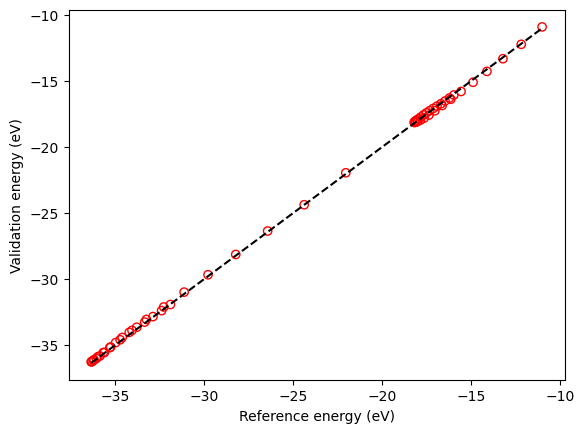

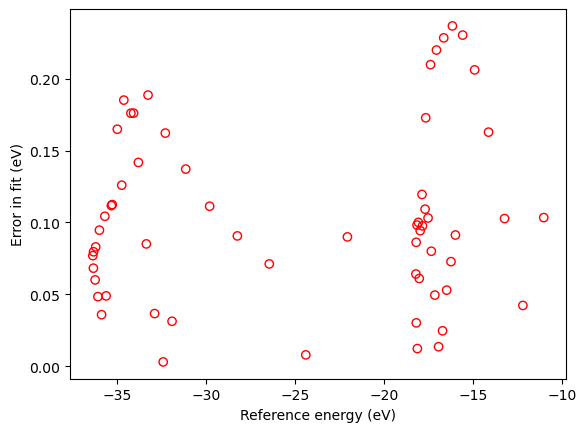

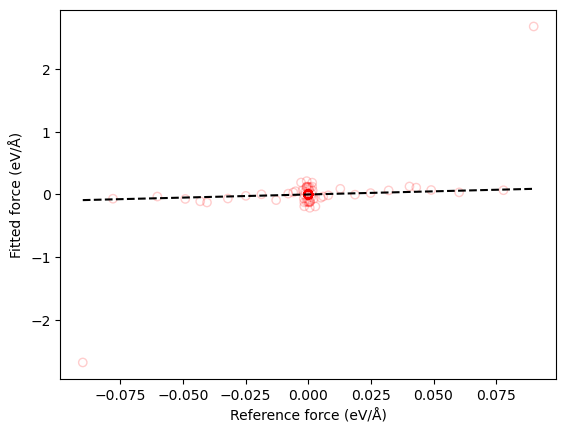

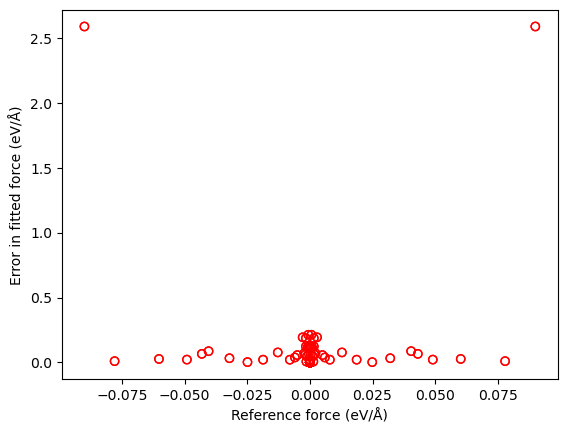

In [13]:
from ccs_fit.scripts.ccs_validate import ccs_validate
ccs_validate(mode="CCS", CCS_params="CCS_params.json", DFT_DB="DFT_ZB_W.db", include_forces=True)

with open("CCS_params.json", "r") as f:
    CCS_params = json.load(f)

with open("structures.json", "r") as f:
    training_set = json.load(f)

err=np.loadtxt("CCS_validate.dat")
plt.xlabel('Reference energy (eV)')
plt.ylabel('Validation energy (eV)')
plt.plot( [min(err[:,0]),max(err[:,0])],[min(err[:,0]),max(err[:,0])],'--',color='black'  )
plt.scatter(err[:,0],err[:,1],facecolors='none', edgecolors='red')
plt.show()
plt.xlabel('Reference energy (eV)')
plt.ylabel('Error in fit (eV)')
plt.scatter(err[:,0],err[:,2],facecolors='none', edgecolors='red')
plt.show()

err_F=np.loadtxt("CCS_validate_forces.dat")
plt.xlabel('Reference force (eV/Å)')
plt.ylabel('Fitted force (eV/Å)')
plt.plot( [min(err_F[:,0]),max(err_F[:,0])],[min(err_F[:,0]),max(err_F[:,0])],'--',color='black')
plt.scatter(err_F[:,0],err_F[:,1],facecolors='none', edgecolors='red',alpha=0.1 )
plt.show()

plt.xlabel('Reference force (eV/Å)')
plt.ylabel('Error in fitted force (eV/Å)')
plt.scatter(err_F[:,0],err_F[:,2],facecolors='none', edgecolors='red')
plt.show()

Buckingham fit (not optimised) for element pair O-O;     V(r) = -42.27*exp(-1.54*r) -(-339.65)/r^6.
Lennard Jones fit (not optimised) for element pair O-O;  V(r) = 4*-105416.75*((0.26/r)^12 - (0.26/r)^6)
Morse fit (not optimised) for element pair O-O;          V(r) = 0.00*(1-np.exp(-6.16*(r-0.01)))^2 + 0.07


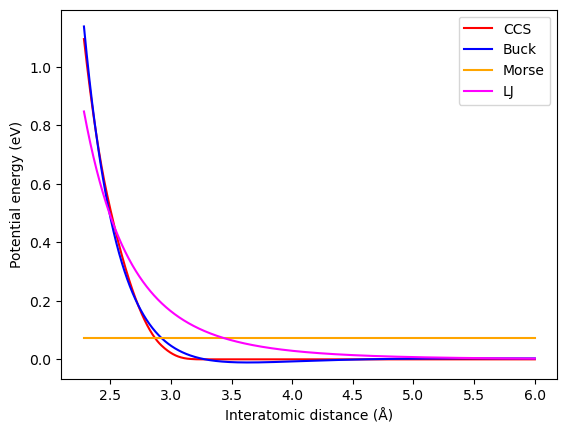

Buckingham fit (not optimised) for element pair O-Zn;     V(r) = 2.86*exp(-30.57*r) -(465.05)/r^6.
Lennard Jones fit (not optimised) for element pair O-Zn;  V(r) = 4*13.76*((1.64/r)^12 - (1.64/r)^6)
Morse fit (not optimised) for element pair O-Zn;          V(r) = 12.13*(1-np.exp(-1.24*(r-1.61)))^2 + -11.87


/home/thism292/anaconda3/envs/CCS_Buck/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


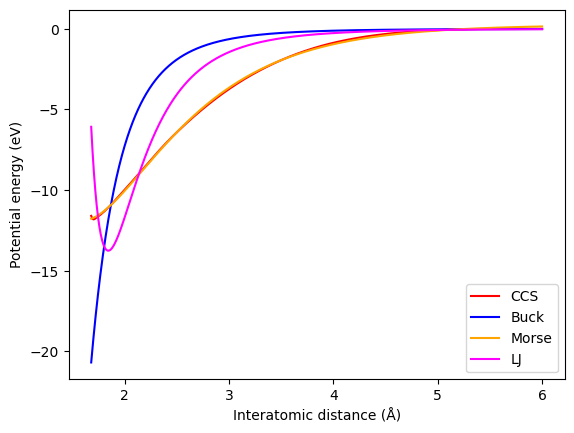

Buckingham fit (not optimised) for element pair Zn-Zn;     V(r) = 132.61*exp(-38.46*r) -(-3189.78)/r^6.
Lennard Jones fit (not optimised) for element pair Zn-Zn;  V(r) = 4*-14.92*((2.13/r)^12 - (2.13/r)^6)
Morse fit (not optimised) for element pair Zn-Zn;          V(r) = 3.28*(1-np.exp(-11.65*(r-0.00)))^2 + 0.25


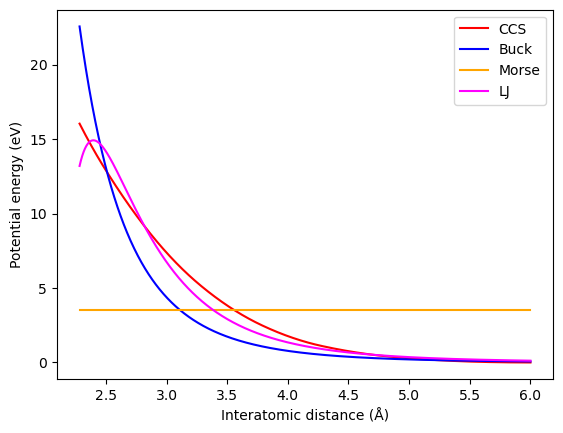

In [14]:
from ccs_fit.scripts.ccs_export_FF import write_FF

write_FF("CCS_params.json")

In [13]:
# Clean up files

import glob
import os

def rm(file):
    try:
        os.remove(file)
    except OSError:
        pass

list=glob.glob("CCS_*")
for file in list:
    rm(file)
rm("structures.json")
rm("ccs.spl")
rm("Buckingham.dat")
rm("Lennard_Jones.dat")
rm("Morse.dat")